
  ##  CAPSTONE  PROJECT : PREDICTING AIRBNB LISTING PRICE  

## Problem Statement

The airbnb is a booming business in the hospitality industry right now . Many people are buying house or renting house to make them airbnbs and increase their income. The aim of this  project is to build a regression  machine learning model that can help in predicting  the price of the airbnb and helping the owner maximize the profits.

In this project, I will work on building a regression model that  predict the listing price of an airbnb and also identifier the features that are needed to maximize  the price. 



### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Pre-Processing](#Pre--proocessing)
- [Modeling](#Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background 



The airbnb is the new way for hospitality and it is a business that is boom 

## Data collection & Data dictionary



I got this dataset from Kaggle.com but it is a combination of different dataset from inside Airbnb.com.It is collection of some listing of houses in different city of United States.https://www.kaggle.com/kritikseth/us-airbnb-open-data

This dataset has one file- AB_US_2020.csv which has columns describing features such as host id, hostname, listing id, listing name, latitude and longitude of listing, the neighbourhood, price, room type, minimum number of nights, number of reviews, last review date, reviews per month, availability, host listings and city.

| Column | Type  | Description | 
| ----------- | ----------- | ----------- |
| id | integer | Airbnb's unique identifier for the listing |
|  name | object | Description of the airbnb |
| host_id | integer | Airbnb's unique identifier for the host/user  |
| host_name | object | Name of the host. Usually just the first name(s). |
| neighbourhood_group | object |The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| neighbourhood | object |The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| latitude | integer | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
|  longitude | integer | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
| room_type | object | Types of places to stay |
|  price | integer | daily price in local currency. Note, $ sign may be used despite locale |
| minimum_nights | integer | minimum number of night stay for the listing (calendar rules may be different)  |
| number_of_reviews | integer | The number of reviews the listing has |
| last_review | object | The date of the last/newest review |
| reviews_per_month | integer | The number of reviews the listing has per month |
| calculated_host_listings_count | integer | The number of listings the host has in the current scrape, in the city/region geography.|
|  availability_365 | integer | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host. |
|  City | object | the city in which the airbnb is located |

## Data Import and  Data Cleaning

We are going to import the libraries  that will be used throughout this project.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor

In [2]:
#import the data
data_airbnb = pd.read_csv(r"C:\Users\irene\OneDrive\Desktop\GA_DSI\dsi-flex-817\Capstone I.I\Data\AB_US_2020.csv")
data_airbnb.head()

C:\Users\irene\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0    Evelyne                 NaN         28804  35.65146  -82.62792   
1    Celeste                 NaN         28801  35.59779  -82.55540   
2       Lisa                 NaN         28801  35.60670  -82.55563   
3    BonPaul                 NaN         28806  35.57864  -82.59578   
4  Elizabeth                 NaN         28801  35.61442  -82.54127   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                138    16/02/20   
1  Entire home/apt    470               1                114    07/09/20   
2  Entire home/apt     75              30                 89    30/11/19   
3  Entire home/apt     90               1                267    22/09/20   
4     Private room    125              30                 58    19/10/15   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.14                               1                 0   
1               1.03                              11               288   
2               0.81                               2               298   
3               2.39                               5                 0   
4               0.52                               1                 0   

        city  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville

In [3]:
data_airbnb.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [4]:
#looking at the data types  and count of the dataset.
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [5]:
#writing a function to see the percentage of missing value for every column in the airbnb dataset.
# code from a collegue Jay Li

def missing_values(data): # function to check missing value 
        mis_total = data.isnull().sum()
        mis_pct = 100 * data.isnull().sum() / len(data)
        mis_value_table = pd.concat([mis_total, mis_pct], axis = 1)
        mis_value_table_columns = mis_value_table.rename(columns = {0 : 'No. of Missing Value', 1 : '% of Total Missing Value'})
        
        mis_value_table_columns = mis_value_table_columns[mis_value_table_columns.iloc[:,1] != 0].sort_values('% of Total Missing Value', ascending = False).round(2)
        return mis_value_table_columns

In [6]:
missing_values(data_airbnb)
# Looking at the table of missing value for the airbnb dataset.

No. of Missing Value  % of Total Missing Value
neighbourhood_group                115845                     51.25
last_review                         48602                     21.50
reviews_per_month                   48602                     21.50
host_name                              33                      0.01
name                                   28                      0.01

In [2]:
#Removing some columns because of their high percentage of missing values 
data_airbnb = data_airbnb.drop(['neighbourhood_group'],axis=1)

NameError: name 'data_airbnb' is not defined

In [ ]:
knn_imp = KNNImputer()
knn_imp_income_missing = knn_imp.fit_transform(income_missing)

knn_imp_income_missing = pd.DataFrame(knn_imp_income_missing, columns = income_missing.columns)

In [7]:
#Looking at the data type of every column
airbnb_us.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [8]:
airbnb_us.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [9]:
# Looking at the summary statistics of the dataset 
airbnb_us.describe(include='all')

id                 name       host_id host_name  \
count   2.260300e+05               226002  2.260300e+05    225997   
unique           NaN               218443           NaN     30533   
top              NaN  Home away from home           NaN   Michael   
freq             NaN                   75           NaN      2025   
mean    2.547176e+07                  NaN  9.352385e+07       NaN   
std     1.317814e+07                  NaN  9.827422e+07       NaN   
min     1.090000e+02                  NaN  2.300000e+01       NaN   
25%     1.515890e+07                  NaN  1.399275e+07       NaN   
50%     2.590916e+07                  NaN  5.138266e+07       NaN   
75%     3.772624e+07                  NaN  1.497179e+08       NaN   
max     4.556085e+07                  NaN  3.679176e+08       NaN   

       neighbourhood_group         neighbourhood       latitude  \
count               110185                226030  226030.000000   
unique                  34                  1450            NaN   
top              Manhattan  Unincorporated Areas            NaN   
freq                 20236                  8020            NaN   
mean                   NaN                   NaN      35.662829   
std                    NaN                   NaN       6.849855   
min                    NaN                   NaN      18.920990   
25%                    NaN                   NaN      32.761783   
50%                    NaN                   NaN      37.261125   
75%                    NaN                   NaN      40.724038   
max                    NaN                   NaN      47.734620   

            longitude        room_type          price  minimum_nights  \
count   226030.000000           226030  226030.000000    2.260300e+05   
unique            NaN                4            NaN             NaN   
top               NaN  Entire home/apt            NaN             NaN   
freq              NaN           154173            NaN             NaN   
mean      -103.220662              NaN     219.716529    4.525490e+02   
std         26.222091              NaN     570.353609    2.103376e+05   
min       -159.714900              NaN       0.000000    1.000000e+00   
25%       -118.598115              NaN      75.000000    1.000000e+00   
50%        -97.817200              NaN     121.000000    2.000000e+00   
75%        -76.919323              NaN     201.000000    7.000000e+00   
max        -70.995950              NaN   24999.000000    1.000000e+08   

        number_of_reviews last_review  reviews_per_month  \
count       226030.000000      177428       177428.00000   
unique                NaN        2377                NaN   
top                   NaN    15/03/20                NaN   
freq                  NaN        2915                NaN   
mean            34.506530         NaN            1.43145   
std             63.602914         NaN            1.68321   
min              0.000000         NaN            0.01000   
25%              1.000000         NaN            0.23000   
50%              8.000000         NaN            0.81000   
75%             39.000000         NaN            2.06000   
max            966.000000         NaN           44.06000   

        calculated_host_listings_count  availability_365           city  
count                    226030.000000     226030.000000         226030  
unique                             NaN               NaN             28  
top                                NaN               NaN  New York City  
freq                               NaN               NaN          45756  
mean                         16.698562        159.314856            NaN  
std                          51.068966        140.179628            NaN  
min                           1.000000          0.000000            NaN  
25%                           1.000000          0.000000            NaN  
50%                           2.000000        140.000000            NaN  
75%                           6.000000        

In [10]:
#Removing some columns because of their high percentage of missing values 
airbnb_us = airbnb_us.drop(['neighbourhood_group','last_review','reviews_per_month'],axis=1)

In [11]:
#sort the dataframes with the lowest price on top to see what is the lowest price 
airbnb_us.sort_values('price', ascending= True).head(5)

# the minum price is zero which is unlikely and I am going to assume that where the price is zero 
#it is a missing values and I am going to delete it.

id                        name    host_id        host_name  \
158818  42431489                 Doxie Hotel  318753867      Doxie Hotel   
11106   42738847       Hotel Granduca Austin  314291208   Hotel Granduca   
157909  41740615  The James New York - NoMad  268417148  The James NoMad   
158633  42279171              The Leon Hotel  265458818   The Leon Hotel   
158741  42384530               Hotel Shocard  265195377    Hotel Shocard   

           neighbourhood  latitude  longitude   room_type  price  \
158818           Midtown  40.75468  -73.99110  Hotel room      0   
11106              78746  30.30181  -97.82910  Hotel room      0   
157909           Midtown  40.74459  -73.98574  Hotel room      0   
158633         Chinatown  40.71610  -73.99518  Hotel room      0   
158741  Theater District  40.75542  -73.98808  Hotel room      0   

        minimum_nights  number_of_reviews  calculated_host_listings_count  \
158818               1                  0                               1   
11106                1                  0                               1   
157909               1                  0                               4   
158633               1                  0                               7   
158741               1                  0                               3   

        availability_365           city  
158818                 0  New York City  
11106                  0         Austin  
157909                 0  New York City  
158633                 0  New York City  
158741                 0  New York City

In [12]:
#Changing the value of price where it is zero to NaN
airbnb_us['price']= airbnb_us['price'].apply(lambda x:np.nan if x == 0 else int(x))

In [13]:
airbnb_us.sort_values('price', ascending= True).head(5)

id                                         name    host_id  \
6152    20654658          EMERGENCY SHELTER - Detached Studio   18827179   
105469  13081350  Parks, Restaurants, Grocery, 7 minute walk.   14761047   
6174    20708014               small room for Harvey evacuees   22987908   
6197    20780987   Private room for folks displaced by Harvey  129897901   
6156    20674436                 Hurricane Harvey Refuge ONLY    3594051   

        host_name neighbourhood  latitude  longitude        room_type  price  \
6152      Brianne         78745  30.19341  -97.79261     Private room    1.0   
105469       John   District 24  36.12191  -86.84492  Entire home/apt    1.0   
6174    Elizabeth         78757  30.35677  -97.73947     Private room    1.0   
6197        Laura         78758  30.35793  -97.70763     Private room    1.0   
6156      Michael         78704  30.23816  -97.74314  Entire home/apt    1.0   

        minimum_nights  number_of_reviews  calculated_host_listings_count  \
6152                 1                  0                               2   
105469              30                 20                               4   
6174                 1                  0                               1   
6197                 1                  1                               1   
6156                 2                  2                               1   

        availability_365       city  
6152                   0     Austin  
105469               336  Nashville  
6174                   0     Austin  
6197                   0     Austin  
6156                   0     Austin

In [14]:
#Droping the NaN  rows 
airbnb_us.dropna(subset=['price']).head()

id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood  latitude  longitude        room_type  price  \
0    Evelyne         28804  35.65146  -82.62792     Private room   60.0   
1    Celeste         28801  35.59779  -82.55540  Entire home/apt  470.0   
2       Lisa         28801  35.60670  -82.55563  Entire home/apt   75.0   
3    BonPaul         28806  35.57864  -82.59578  Entire home/apt   90.0   
4  Elizabeth         28801  35.61442  -82.54127     Private room  125.0   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                138                               1   
1               1                114                              11   
2              30                 89                               2   
3               1                267                               5   
4              30                 58                               1   

   availability_365       city  
0                 0  Asheville  
1               288  Asheville  
2               298  Asheville  
3                 0  Asheville  
4                 0  Asheville

In [15]:
airbnb_us.sort_values('price', ascending= True).head(5)

id                                         name    host_id  \
6152    20654658          EMERGENCY SHELTER - Detached Studio   18827179   
105469  13081350  Parks, Restaurants, Grocery, 7 minute walk.   14761047   
6174    20708014               small room for Harvey evacuees   22987908   
6197    20780987   Private room for folks displaced by Harvey  129897901   
6156    20674436                 Hurricane Harvey Refuge ONLY    3594051   

        host_name neighbourhood  latitude  longitude        room_type  price  \
6152      Brianne         78745  30.19341  -97.79261     Private room    1.0   
105469       John   District 24  36.12191  -86.84492  Entire home/apt    1.0   
6174    Elizabeth         78757  30.35677  -97.73947     Private room    1.0   
6197        Laura         78758  30.35793  -97.70763     Private room    1.0   
6156      Michael         78704  30.23816  -97.74314  Entire home/apt    1.0   

        minimum_nights  number_of_reviews  calculated_host_listings_count  \
6152                 1                  0                               2   
105469              30                 20                               4   
6174                 1                  0                               1   
6197                 1                  1                               1   
6156                 2                  2                               1   

        availability_365       city  
6152                   0     Austin  
105469               336  Nashville  
6174                   0     Austin  
6197                   0     Austin  
6156                   0     Austin

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

In [16]:
airbnb_us['neighbourhood'].value_counts()

Unincorporated Areas          8020
Hollywood                     4384
Primary Urban Center          4179
Hennepin                      3935
Kihei-Makena                  3894
                              ... 
Bay Terrace, Staten Island       1
North Kennedy Tract              1
Huguenot                         1
Tottenville                      1
Peralta-Laney                    1
Name: neighbourhood, Length: 1450, dtype: int64

In [17]:
airbnb_us['city'].unique()

array(['Asheville', 'Austin', 'Boston', 'Broward County', 'Cambridge',
       'Chicago', 'Clark County', 'Columbus', 'Denver', 'Hawaii',
       'Jersey City', 'Los Angeles', 'Nashville', 'New Orleans',
       'New York City', 'Oakland', 'Pacific Grove', 'Portland',
       'Rhode Island', 'Salem', 'San Clara Country', 'San Diego',
       'San Francisco', 'San Mateo County', 'Santa Cruz County',
       'Seattle', 'Twin Cities MSA', 'Washington D.C.'], dtype=object)

In [18]:
airbnb_us.isnull().sum()

id                                 0
name                              28
host_id                            0
host_name                         33
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             62
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
city                               0
dtype: int64

In [19]:
airbnb_us = airbnb_us.dropna()

In [20]:
airbnb_us.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

### Exploratory Data Analysis

In this phase we are going to look at the features of our dataset  analysing them , looking at there distribution , the correlation they have with price to help us build a model that will pedict the price.

In [21]:
#airbnb_us.groupby('room_type')['price'].count()

In [22]:
airbnb_us.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.537591 -0.057874  -0.010435   
host_id                         0.537591  1.000000 -0.049321   0.009027   
latitude                       -0.057874 -0.049321  1.000000   0.579955   
longitude                      -0.010435  0.009027  0.579955   1.000000   
price                           0.021537  0.019986 -0.054363  -0.057720   
minimum_nights                 -0.001617 -0.002003  0.000647  -0.001541   
number_of_reviews              -0.381661 -0.188745  0.047414  -0.034215   
calculated_host_listings_count  0.162254  0.103406 -0.182668  -0.168386   
availability_365                0.051265  0.086910 -0.177495  -0.145607   

                                   price  minimum_nights  number_of_reviews  \
id                              0.021537       -0.001617          -0.381661   
host_id                         0.019986       -0.002003          -0.188745   
latitude                       -0.054363        0.000647           0.047414   
longitude                      -0.057720       -0.001541          -0.034215   
price                           1.000000       -0.000560          -0.072542   
minimum_nights                 -0.000560        1.000000          -0.000887   
number_of_reviews              -0.072542       -0.000887           1.000000   
calculated_host_listings_count  0.043066       -0.000638          -0.119663   
availability_365                0.035077       -0.002383           0.051925   

                                calculated_host_listings_count  \
id                                                    0.162254   
host_id                                               0.103406   
latitude                                             -0.182668   
longitude                                            -0.168386   
price                                                 0.043066   
minimum_nights                                       -0.000638   
number_of_reviews                                    -0.119663   
calculated_host_listings_count                        1.000000   
availability_365                                      0.162401   

                                availability_365  
id                                      0.051265  
host_id                                 0.086910  
latitude                               -0.177495  
longitude                              -0.145607  
price                                   0.035077  
minimum_nights                         -0.002383  
number_of_reviews                       0.051925  
calculated_host_listings_count          0.162401  
availability_365                        1.000000

<AxesSubplot:>

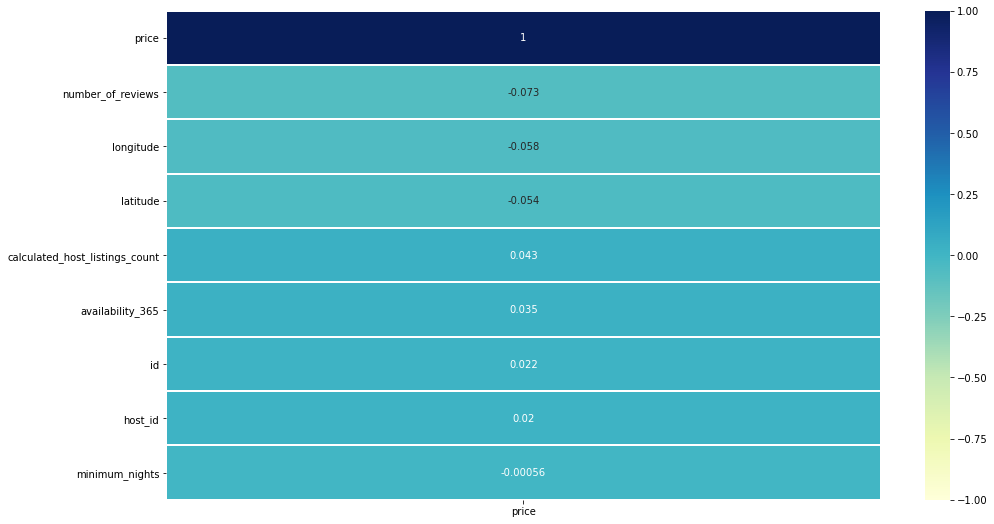

In [23]:
#the correlation ofthe features we have with the price  
plt.figure(figsize=(16,9))
sns.heatmap(airbnb_us.corr()[['price']].sort_values(by='price' ,key=abs, ascending=False),annot=True, cmap="YlGnBu" , vmin=-1, vmax=1, linewidths=1)

This initial correlation heatmap with the numerical features with the price show that there is no high correlation with any features we have .
To remidy that we have to do some features engineering like combining the longitude and latitude to have a location.

In [24]:
airbnb_us_cp = airbnb_us.copy()

In [25]:
airbnb_us_cp.head()

id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood  latitude  longitude        room_type  price  \
0    Evelyne         28804  35.65146  -82.62792     Private room   60.0   
1    Celeste         28801  35.59779  -82.55540  Entire home/apt  470.0   
2       Lisa         28801  35.60670  -82.55563  Entire home/apt   75.0   
3    BonPaul         28806  35.57864  -82.59578  Entire home/apt   90.0   
4  Elizabeth         28801  35.61442  -82.54127     Private room  125.0   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                138                               1   
1               1                114                              11   
2              30                 89                               2   
3               1                267                               5   
4              30                 58                               1   

   availability_365       city  
0                 0  Asheville  
1               288  Asheville  
2               298  Asheville  
3                 0  Asheville  
4                 0  Asheville

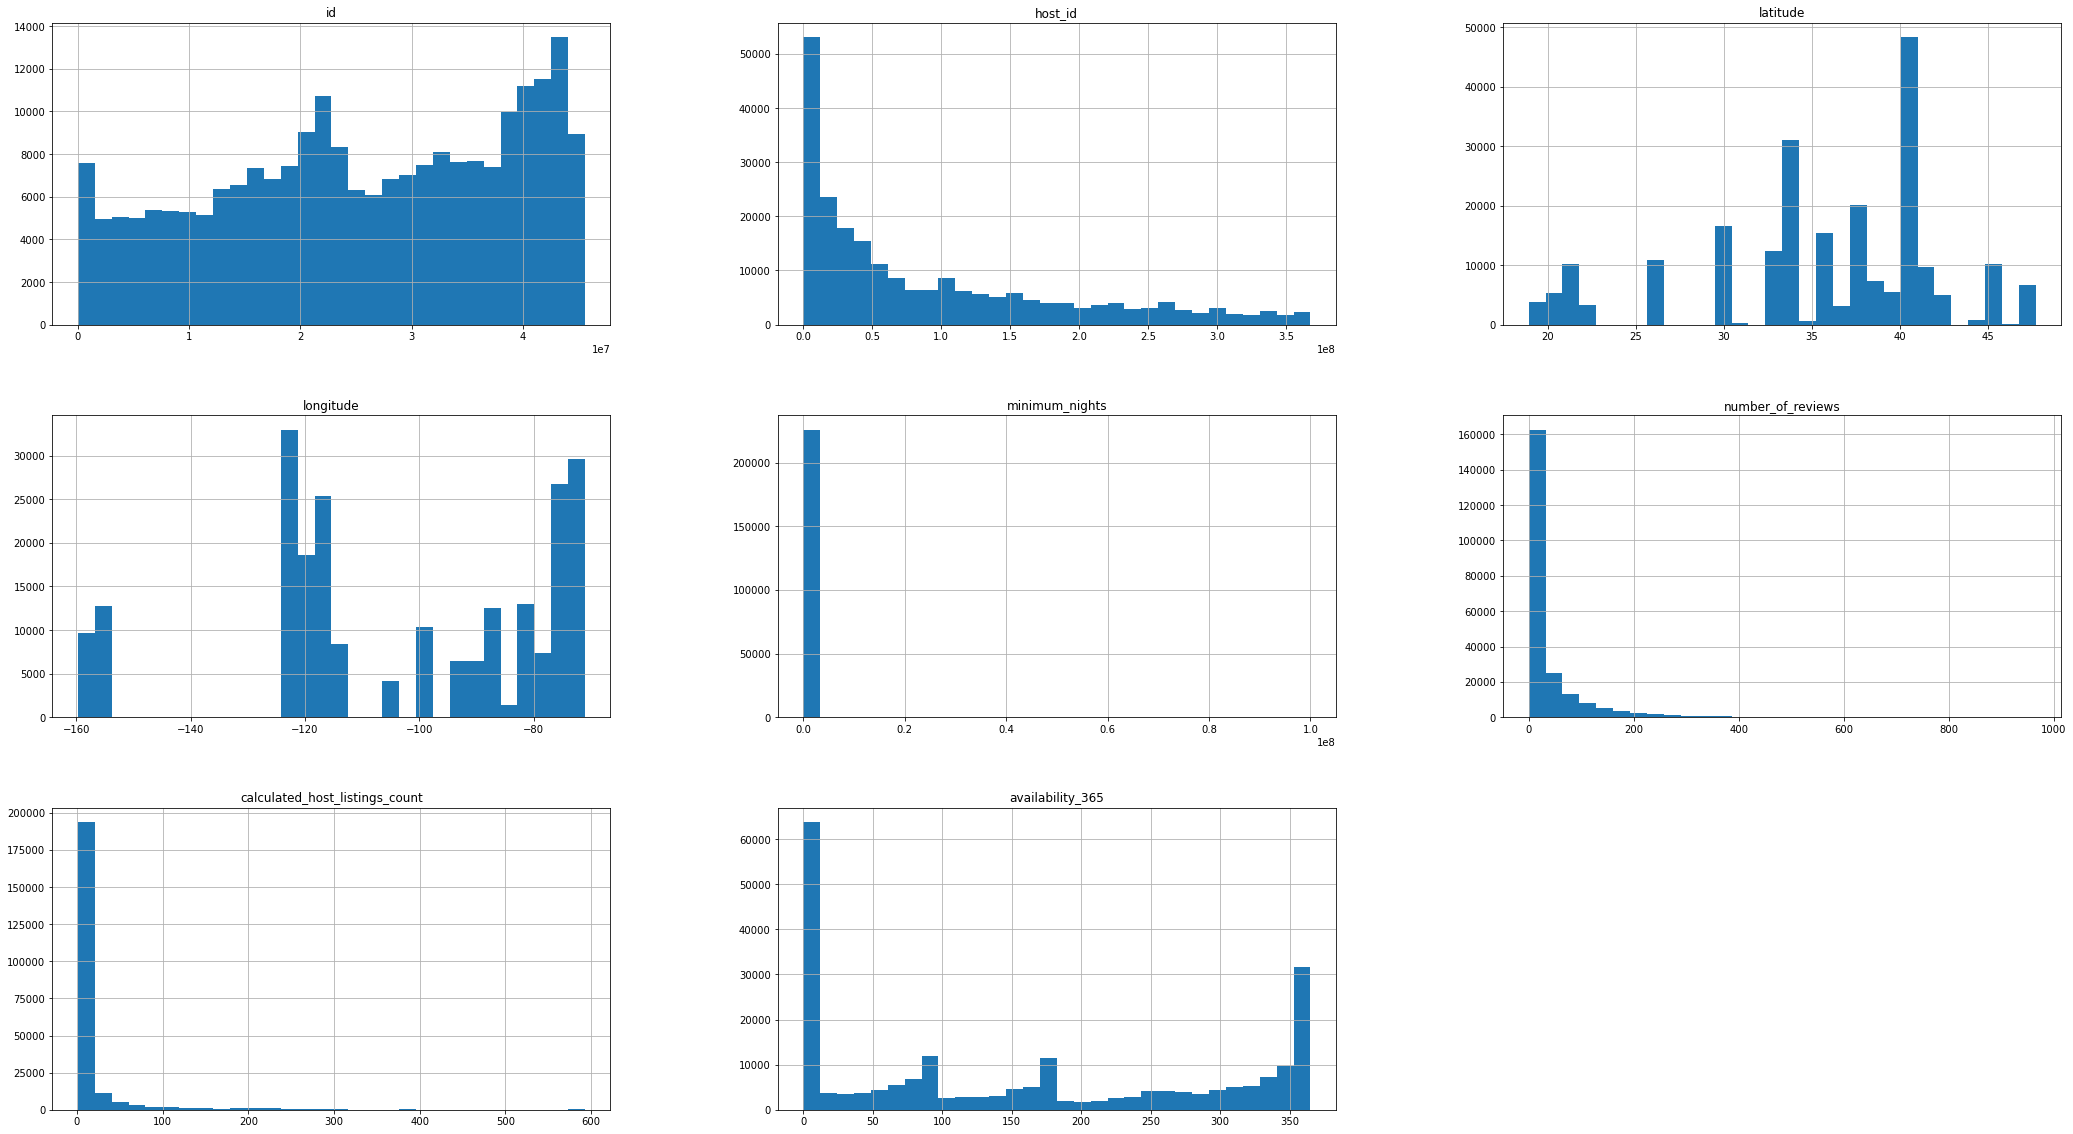

In [38]:
# looking at the distribution of the features  
airbnb_us_cp.hist(bins= 30,figsize = (36,20));


C:\Users\irene\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


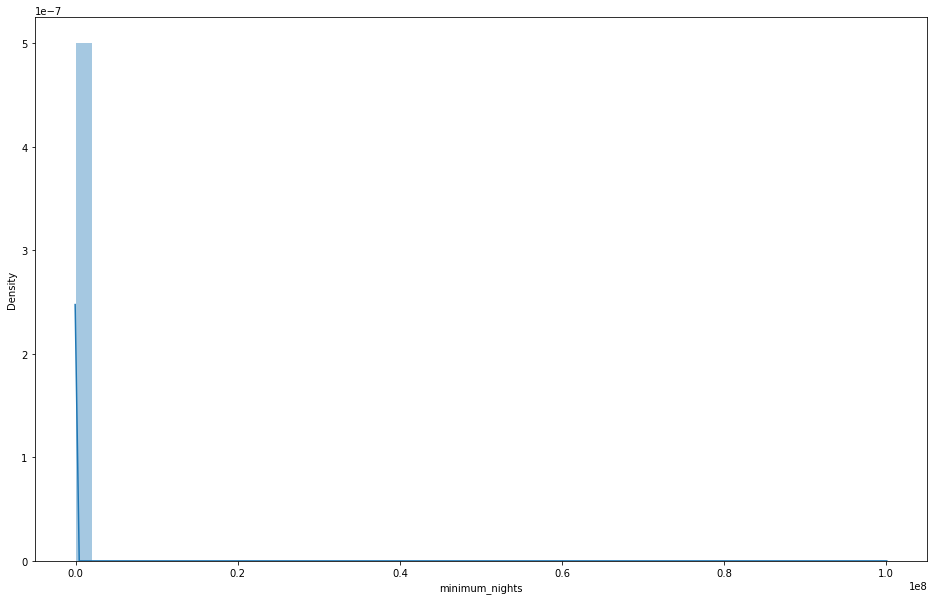

In [27]:
# distribution of the minimun  nights spent in the airbnb
plt.figure (figsize = (16, 10))
sns.distplot(airbnb_us_cp['minimum_nights']);

C:\Users\irene\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


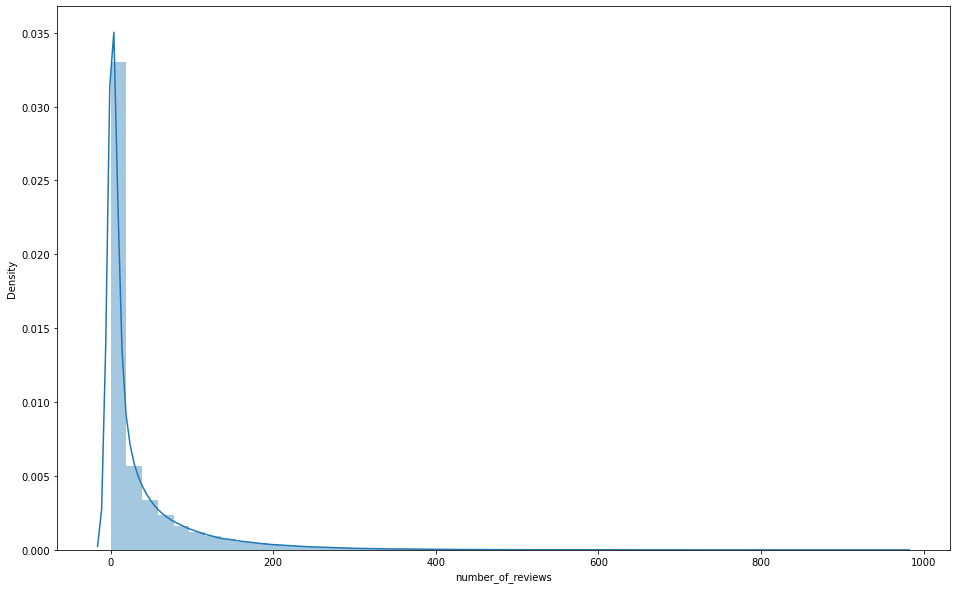

In [28]:
# looking at the distributions of number of reviews 
plt.figure (figsize = (16, 10))
sns.distplot(airbnb_us_cp['number_of_reviews']);

C:\Users\irene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


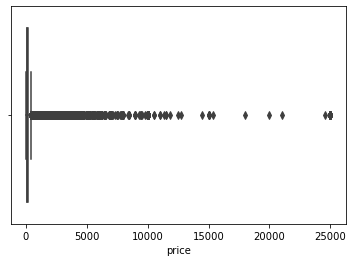

In [29]:
# distribution of the price 
sns.boxplot(airbnb_us_cp['price']);

In [42]:
# After looking at the distribution we can assume that above the price of $ 15000 per night those are outliers 
df1 = airbnb_us_cp[airbnb_us_cp['price'] < 15000]

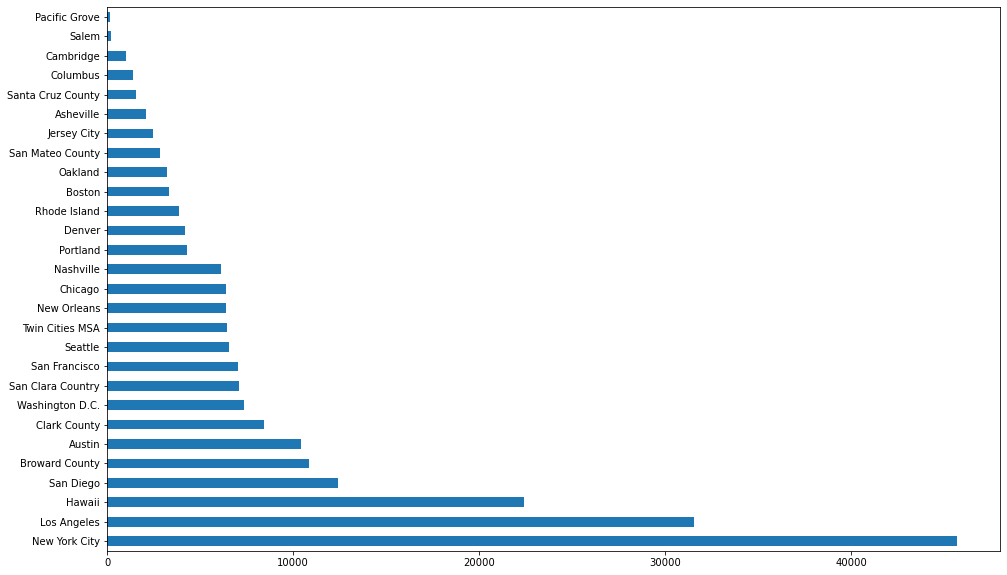

In [31]:
# looked at the numbers of airbnb per city to see which city has the most airbnb 
plt.figure (figsize = (16, 10))
airbnb_us['city'].value_counts().plot(kind = 'barh')
plt.show()

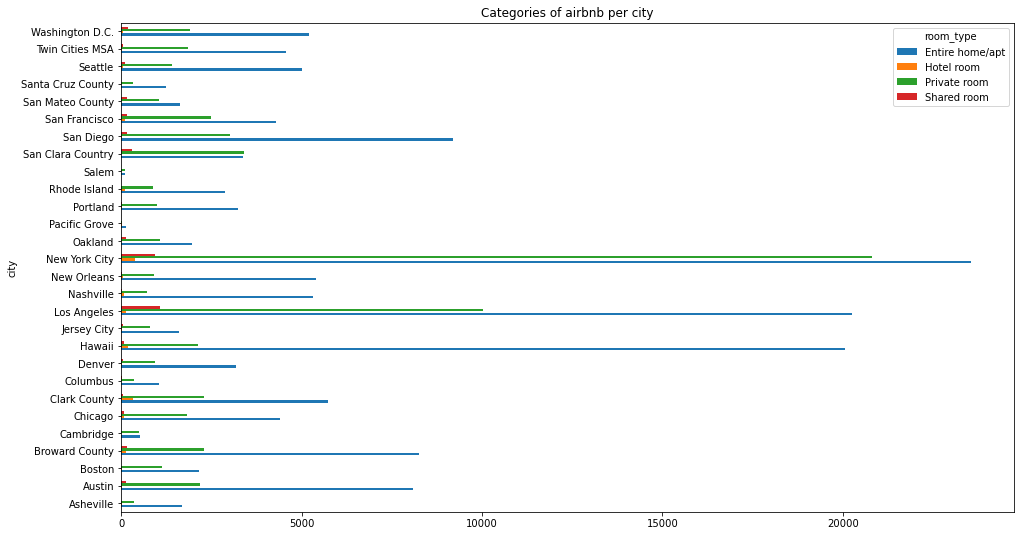

In [43]:
plt.rcParams["figure.figsize"] = [16,9]
df1.groupby(['city','room_type']
                ).size().unstack(fill_value=0).plot(kind="barh")
plt.title('Categories of airbnb per city');

In [ ]:
#plt.rcParams["figure.figsize"] = [16,9]
#airbnb_us_cp.groupby(['city','room_type']).count()['price'].unstack(fill_value=0).plot(kind="barh")
               

In [ ]:
#looking at the number of airbnb type in each city from the one

#airbnb_us_cp.groupby(['city','room_type']).count()['price'].unstack(fill_value=0)

C:\Users\irene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

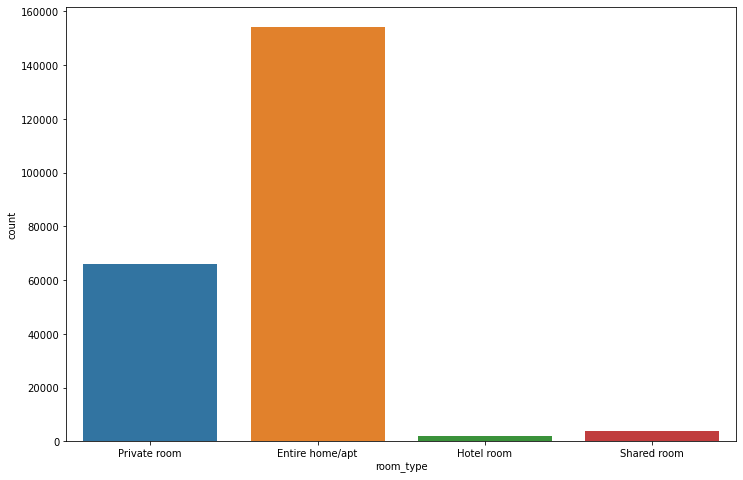

In [34]:
fig, ax = plt.subplots(figsize = (12,8)) 
sns.countplot(airbnb_us_cp['room_type'])

In [ ]:
#plt.figure(figsize=(16,15))
#airbnb_us_cp.groupby('city')[['price']].mean().sort_values(by='price', ascending=True).plot(kind="barh")


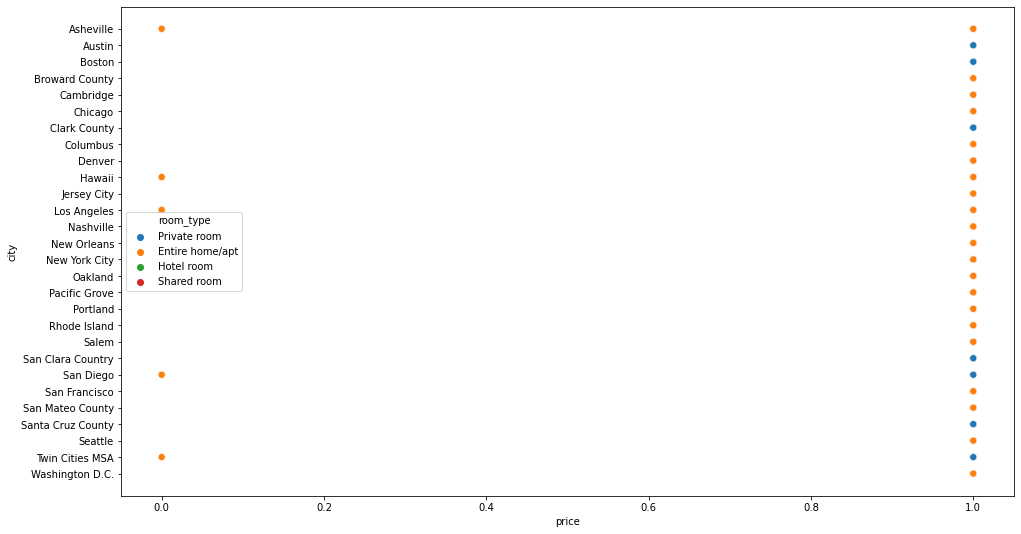

In [44]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x="price", y="city", hue= "room_type",s=50,data=df1);

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

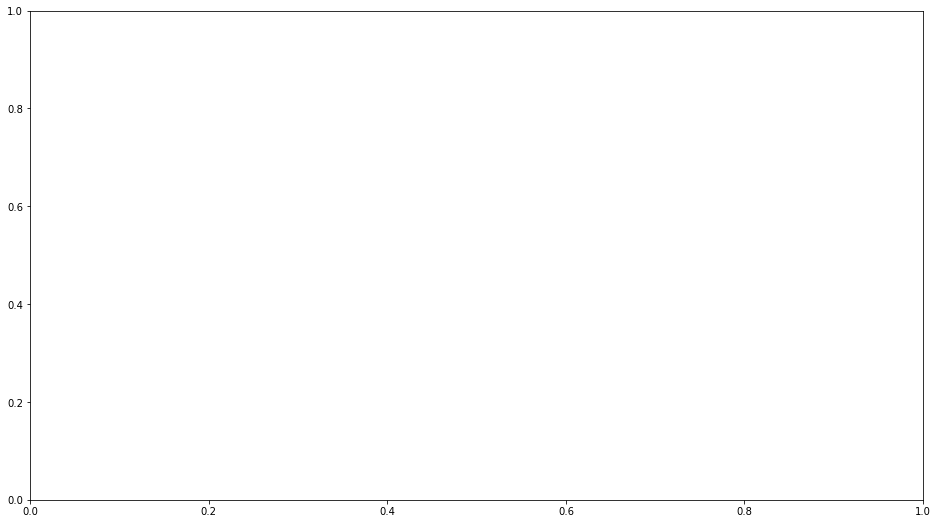

In [37]:
#plt.figure (figsize = (16, 9))
#fig = sns.boxplot(x="room_type", y="price",data=airbnb_us_cp);

C:\Users\irene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

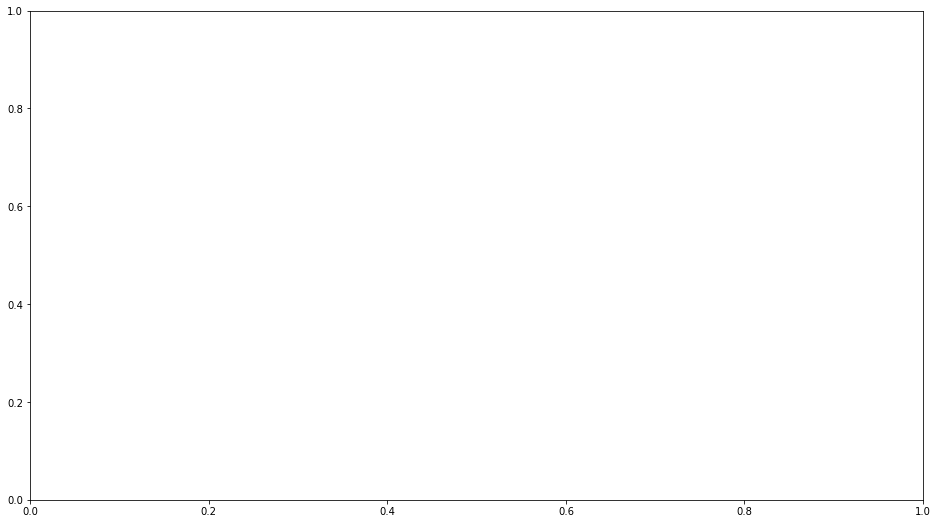

In [45]:
sns.boxplot(df1['price']);

C:\Users\irene\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


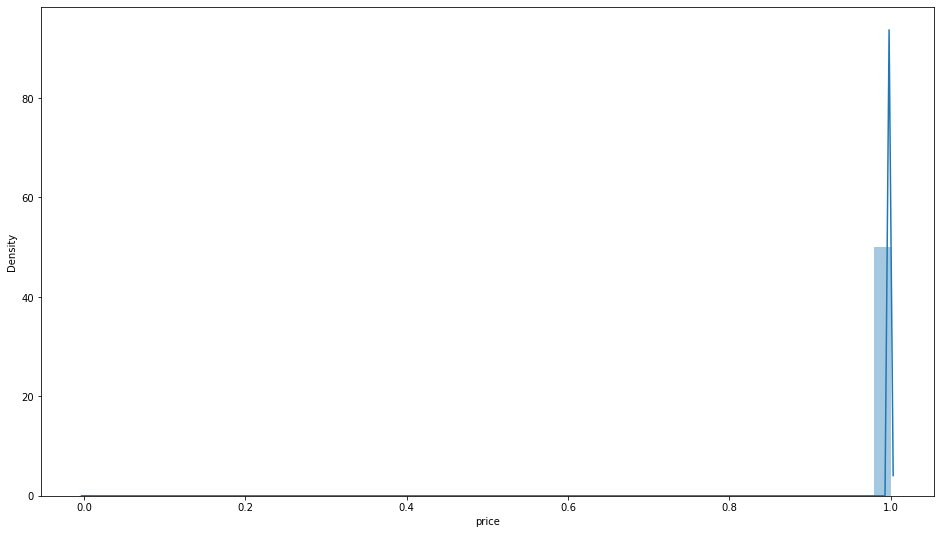

In [46]:
sns.distplot(df1['price']);

In [ ]:
airbnb_us_cp['log_price'] = np.log1p(airbnb_us_cp['price']) # log transformation.

In [ ]:
sns.distplot(airbnb_us_cp['log_price']);

### Pre-Processing for categoricals features

In [ ]:
# creating a helper function that  can change the unique values into a category
# I need to create a dictionary where the keys are the unique values of a given column 
# the values will be the labelencoder of those unique values
from sklearn.preprocessing import LabelEncoder
def cat_columns(col):
    column_values = col.unique()
    column_df = pd.DataFrame(column_values, columns=['unique_value_col'])
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    column_df['column_cat'] = labelencoder.fit_transform(column_df['unique_value_col'])
    cat = {column_df['unique_value_col'][i]:column_df['column_cat'][i] for i in range (len(column_df['unique_value_col']))}
    col_cat = pd.DataFrame(col.map(cat))
  
    
        
        
    return col_cat

In [ ]:
cat_columns(airbnb_us_cp['city'])

In [ ]:
airbnb_us_cp.columns

In [ ]:
airbnb_us_cp.head()

In [ ]:
airbnb_us_cp['host_name_cat'] = cat_columns(airbnb_us_cp['host_name'])
airbnb_us_cp['neighbourhood_cat'] = cat_columns(airbnb_us_cp['neighbourhood'])
airbnb_us_cp['room_type_cat'] = cat_columns(airbnb_us_cp['room_type'])
airbnb_us_cp['city_cat'] = cat_columns(airbnb_us_cp['city'])

In [ ]:
airbnb_us_cp.head()

In [ ]:
airbnb_us_cp.columns

### Modeling  1 

In [ ]:
features = [ 'latitude','longitude','minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'host_name_cat', 'neighbourhood_cat',
       'room_type_cat', 'city_cat']
X = airbnb_us_cp [features]
y = airbnb_us_cp['log_price']


In [ ]:
X.isnull().sum()

In [ ]:
X.info()

In [ ]:
X.dtypes

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
X_clean = clean_dataset(X)

In [ ]:
y.isnull().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, train_size=0.7, random_state=42)

In [ ]:
X_train.shape

## Baseline model : linear regression 

## Decision tree model

In [ ]:
#instatntiate DecisionTreeRegressor()
dtr = DecisionTreeRegressor(random_state=42)
#Fit the model 
dtr.fit(X_train,y_train)

In [ ]:
#Using decision tree
#calculate the y preds
dtr_preds_test = dtr.predict(X_test)
dtr_preds_train = dtr.predict(X_train)
# calculate RMSE
dtr_rmse_test = mean_squared_error(np.exp(y_test),np.exp(dtr_preds_test) , squared=False)
dtr_rmse_train = mean_squared_error(np.exp(y_train), np.exp(dtr_preds_train), squared=False)
print (f"trainning RMSE:{dtr_rmse_train}")
print (f"test RMSE :{dtr_rmse_test}")



In [ ]:
# Using the decision tree the accurracy on the train data is very high but there is a high variance 
dtr.score(X_train,y_train)

In [ ]:
dtr.score(X_test,y_test)

## Random forest model 

In [ ]:
#instatntiate random forest regressor
rfr = RandomForestRegressor(random_state=42)
#Fit the model 
rfr.fit(X_train,y_train)

In [ ]:
#Using random forest
#calculate the y preds
rfr_preds_test = rfr.predict(X_test)
rfr_preds_train = rfr.predict(X_train)
# calculate RMSE
rfr_rmse_test = mean_squared_error(np.exp(y_test),np.exp(rfr_preds_test) , squared=False)
rfr_rmse_train = mean_squared_error(np.exp(y_train), np.exp(rfr_preds_train), squared=False)
print (f"trainning RMSE:{rfr_rmse_train}")
print (f"test RMSE :{rfr_rmse_test}")

In [ ]:
rfr.score(X_train,y_train)

In [ ]:
rfr.score(X_test,y_test)

In [ ]:
rf_feature = pd.Series(index = X_train.columns, data = np.abs(rfr.feature_importances_))
rf_feature

the room_type and location are the features that have over 10% influences on the prediction of the price

### Pre-Processing  using NLP

In [ ]:
# make a new dataframe with the name and price columns to analyze the description and the if there is an impact on the price 

columns= ['name','price']
airbnb_descr = airbnb_us_cp[columns]
airbnb_descr.head()

In [ ]:
airbnb_descr['name_length']= airbnb_descr['name'].str.len()
airbnb_descr['name_word_count']= airbnb_descr['name'].str.split().str.len()
airbnb_descr.head()

In [ ]:
plt.figure(figsize=(16,9))
sns.pairplot(data=airbnb_descr, corner=True,palette='Blues');

In [ ]:
plt.figure(figsize=(16,9))

plt.hist(airbnb_descr['name_length'], bins=30);

We can se that most of the decription is under 50 characters 

In [ ]:
plt.figure(figsize=(16,9))

plt.hist(airbnb_descr['name_word_count'],bins=30);

We can see that most the name of the airbnb listing house are under 10 words and their distribution is right skewed.

In [ ]:
plt.figure(figsize=(16,9))

sns.boxplot(data=airbnb_descr, x='name_length');

In [ ]:
plt.figure(figsize=(16,9))

sns.boxplot(data=airbnb_descr, x='name_word_count');

### Removing special character  and tokenizing

In [ ]:
df_name = airbnb_descr['name']

In [ ]:
# Instantiate tokenizer.
#tokenizer_1 = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [ ]:
def txt_process(text):
    # Instantiate tokenizer.
    tokenizer_1 = RegexpTokenizer(r'\w+', gaps=False)
    text_tokens = tokenizer_1.tokenize(text)
    #remove stop word 
    text_tokens_clean = [token for token in text_tokens if token not in stopwords.words('english')]
    # Instantiate lemmatizer. 
    lemmatizer = WordNetLemmatizer()
    # Lemmatize tokens.
    tokens_lem = [lemmatizer.lemmatize(token) for token in text_tokens_clean]
    return tokens_lem
    

In [ ]:
df_name_prs = airbnb_descr['name'].apply(txt_process)
df_name_prs.head()

In [ ]:
import gensim
from gensim.models.word2vec import Word2Vec
corpus = df_name_prs
model = Word2Vec(corpus,
                 
                 vector_size=100,    
                 window=5,    
                 min_count=1, 
                 sg=0,       
                 workers=4)   
# I have to download gensim to be able to use the word2vec

In [ ]:
print(model)

In [ ]:
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA


In [ ]:
len(model.wv)


In [ ]:
list(model.wv.index_to_key)

In [ ]:
word_vectors = model.wv.get_normed_vectors()
word_vectors

In [ ]:
X =word_vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create df from the pca results
pca_df = pd.DataFrame(result, columns = ['x','y'])

#add the words for the hover effect
pca_df['word'] = list(model.wv.index_to_key)
pca_df.head()

In [ ]:
pca_df.shape

In [ ]:
plt.figure (figsize = (16, 9))
fig = sns.scatterplot(x='x', y="y",data=pca_df);

In [ ]:
model.similar_by_word('')

In [ ]:
#labels = pca_df.plot.labels(x="X", y="Y", text="Word", text_baseline="top")

#points = pca_df.plot.scatter(x="X", y="Y", color=Plot.blue, padding=0.5)

#plot = (points * labels).opts(
   # title="PCA of Words (SKLearn)",
    #width=Plot.width,
   # height=Plot.height,
   # fontscale=Plot.fontscale,
)

#outcome = Embed(plot=plot, file_name="sklearn_pca_words")()

In [ ]:
model.wv.most_similar('Bedroom')


### using countvectorizer

In [ ]:
cvec = CountVectorizer(max_features=4000,
                       stop_words='english',
                       min_df=2,
                         )

In [ ]:
df_name = airbnb_descr['name']
df_name.head()

In [ ]:
df_name.isnull().sum()

In [ ]:
df_name = df_name.dropna()

In [ ]:
#df_name_cln = df_name.apply(txt_process)
#df_name_prs.head()

In [ ]:
df_name_cvec = cvec.fit_transform(df_name)
df_name_cvec

In [ ]:
df_name_cvec.todense()

In [ ]:
abnb_desc_cv= pd.DataFrame(df_name_cvec.todense(), columns = cvec.get_feature_names())
abnb_desc_cv.head()

In [ ]:
abnb_desc_cv.sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind="barh")

In [ ]:
cvec2 = CountVectorizer(max_features=4000,
                       stop_words='english',
                       min_df=2,
                       ngram_range=(2,2),
                         )
df_name_cvec2 = cvec2.fit_transform(df_name)
abnb_desc_cv2= pd.DataFrame(df_name_cvec2.todense(), columns = cvec2.get_feature_names())
abnb_desc_cv2.sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind="barh")

Using a countvextorizer with 2 ngrams we can see that private room that may have access to the ocean view or beach ar in the top characheristics of the airbnb.

In [ ]:
#using the dataframe that is tolenize and lemmitize
#""""cvec2 = CountVectorizer(max_features=4000,
                       #stop_words='english',
                      # min_df=2,
                      # ngram_range=(2,2),
                         )
#df_name_cvec2 = cvec2.fit_transform(df_name_prs)
#abnb_desc_cv2= pd.DataFrame(df_name_cvec2.todense(), columns = cvec2.get_feature_names())
#abnb_desc_cv2.sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind="barh")"""

#### Using  tfidf vectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=1000,
                        stop_words='english',
                       min_df=2,
                       max_df=.95,
                       ngram_range=(1,1),
                       )
                       
df_name_tfidf = tfidf.fit_transform(df_name)
abnb_desc_tf= pd.DataFrame(df_name_tfidf.todense(), columns = tfidf.get_feature_names())
abnb_desc_tf.sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind="barh")

In [ ]:
tfidf2 = TfidfVectorizer(max_features=1000,
                       stop_words='english',
                       min_df=2,
                       ngram_range=(2,2),
                       )
df_name_tfidf2 = tfidf2.fit_transform(df_name)
abnb_desc_tf2= pd.DataFrame(df_name_tfidf2.todense(), columns = tfidf2.get_feature_names())
abnb_desc_tf2.sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind="barh")

combining the dataframe from tdid

In [ ]:
abnb_desc_tf2.shape

In [ ]:
abnb_desc_cv2.shape

In [ ]:
 airbnb_us_cp .shape

In [ ]:
df = pd.concat([T1.reset_index(drop=True),T2.reset_index(drop=Tru‌​e)], axis=1)

In [ ]:
new_df = pd.concat([airbnb_us_cp.reset_index(drop=True),abnb_desc_tf2.reset_index(drop=True)],axis=1)
new_df.head()

In [ ]:
new_df.to_csv('./data/data_clean.csv', index = False)

Building a new model with the nlp part 

## Modeling 

In [ ]:
new_df.shape


In [ ]:
data_new = pd.read_csv('./data/data_clean.csv')

In [ ]:
['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'city', 'log_price', 'host_name_cat',
       'neighbourhood_cat', 'room_type_cat', 'city_cat'],
features = [ 'latitude','longitude','minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'host_name_cat', 'neighbourhood_cat',
       'room_type_cat', 'city_cat']

In [ ]:
features_to_drop=['id', 'name', 'host_id', 'host_name', 'neighbourhood','room_type', 'price','city', 'log_price']

In [ ]:
features_to_drop=['id', 'name', 'host_id', 'host_name', 'neighbourhood','room_type', 'price','city', 'log_price']
X_new = data_new.drop(features_to_drop,axis=1)
y = data_new['log_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7, random_state=42)

In [ ]:
#instatntiate random forest regressor
rfr = RandomForestRegressor(random_state=42)
#Fit the model 
rfr.fit(X_train,y_train)

In [ ]:
#Using random forest
#calculate the y preds
rfr_preds_test = rfr.predict(X_test)
rfr_preds_train = rfr.predict(X_train)
# calculate RMSE
rfr_rmse_test = mean_squared_error(np.exp(y_test),np.exp(rfr_preds_test) , squared=False)
rfr_rmse_train = mean_squared_error(np.exp(y_train), np.exp(rfr_preds_train), squared=False)
print (f"trainning RMSE:{rfr_rmse_train}")
print (f"test RMSE :{rfr_rmse_test}")

In [ ]:
rfr.score(X_train,y_train)

In [ ]:
rfr.score(X_test,y_test)

In [ ]:
rf_feature = pd.Series(index = X_train.columns, data = np.abs(rfr.feature_importances_))
rf_feature